In [1]:
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
# Reading in data
league_df = pd.read_csv(Path('2023_LoL_esports_match_data_from_OraclesElixir.csv'))
league_df.head() 

C:\Users\clayt\AppData\Local\Temp\ipykernel_20564\1704113970.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  league_df = pd.read_csv(Path('2023_LoL_esports_match_data_from_OraclesElixir.csv'))


,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,...,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
0,ESPORTSTMNT06_2753012,complete,NaN,LFL2,2023,Spring,0,2023-01-10 17:07:16,1,13.01,...,131.0,322.0,263.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ESPORTSTMNT06_2753012,complete,NaN,LFL2,2023,Spring,0,2023-01-10 17:07:16,1,13.01,...,117.0,-357.0,-1323.0,-43.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ESPORTSTMNT06_2753012,complete,NaN,LFL2,2023,Spring,0,2023-01-10 17:07:16,1,13.01,...,162.0,-479.0,-324.0,-26.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ESPORTSTMNT06_2753012,complete,NaN,LFL2,2023,Spring,0,2023-01-10 17:07:16,1,13.01,...,122.0,200.0,292.0,20.0,0.0,0.0,0.0,1.0,0.0,0.0
4,ESPORTSTMNT06_2753012,complete,NaN,LFL2,2023,Spring,0,2023-01-10 17:07:16,1,13.01,...,3.0,-216.0,-579.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [3]:
# Checking leagues and splits
print(league_df['league'].unique())
print(league_df['split'].unique())

['LFL2' 'DDH' 'EL' 'LPL' 'GL' 'LCKC' 'NEXO' 'UL' 'LVP SL' 'LCK' 'LFL'
 'PRM' 'LMF' 'SL (LATAM)' 'VL' 'CBLOL' 'LEC' 'NACL' 'LCO' 'CBLOLA' 'LHE'
 'NLC' 'GLL' 'ESLOL' 'LLA' 'EBL' 'TCL' 'PGN' 'LPLOL' 'LCS' 'HM' 'LJL' 'HC'
 'AL' 'PCS' 'LDL' 'VCS' 'EM' 'MSI' 'LAS' 'LRN' 'LRS' 'EPL' 'LJLA' 'CT'
 'WLDs' 'CDF' 'IC']
['Spring' nan 'Split 2' 'Split 1' 'Winter' 'Opening' 'Placements' 'Summer'
 'Champ 1' 'Split 3' 'Closing' 'Finals' 'BLX Masters' 'Champ 2']


In [5]:
# Aquiring team data for Spring LCS
lcs_team_league_df = league_df[(league_df['position'] == 'team') & (league_df['league'] == 'LCS') & (league_df['split'] == 'Spring')].reset_index(drop=True)

# Aquiring relevant columns for teams
lcs_team_league_df = lcs_team_league_df[['gameid','result','teamkills','teamdeaths','firstblood','gamelength','dpm','cspm']].dropna()

# Displaying data
lcs_team_league_df.head()

,gameid,result,teamkills,teamdeaths,firstblood,gamelength,dpm,cspm
0,ESPORTSTMNT02_3140740,1,25,8,1.0,1954,3111.2794,31.3511
1,ESPORTSTMNT02_3140740,0,8,25,0.0,1954,2041.1054,30.2149
2,ESPORTSTMNT02_3141793,1,18,17,1.0,2582,2397.3044,33.2998
3,ESPORTSTMNT02_3141793,0,16,19,0.0,2582,2149.7986,31.5569
4,ESPORTSTMNT02_3139796,0,8,16,0.0,1896,1966.5190,33.2911


In [6]:
# Creating dataframe comparing team data (result = 1 if team x won the match, result = 0 if team y won the match)
winning_teams_df = lcs_team_league_df[(lcs_team_league_df['result'] == 1)].reset_index(drop=True)
losing_teams_df =  lcs_team_league_df[(lcs_team_league_df['result'] == 0)].reset_index(drop=True)

combined_winning_teams_df = pd.merge(winning_teams_df, losing_teams_df, on='gameid', how='inner')
combined_losing_teams_df = pd.merge(losing_teams_df, winning_teams_df, on='gameid', how='inner')

combined_teams_df = pd.concat([combined_winning_teams_df, combined_losing_teams_df], ignore_index=True)
combined_teams_df = combined_teams_df.drop(['gameid','result_y'], axis=1)

combined_teams_df

,result_x,teamkills_x,teamdeaths_x,firstblood_x,gamelength_x,dpm_x,cspm_x,teamkills_y,teamdeaths_y,firstblood_y,gamelength_y,dpm_y,cspm_y
0,1,25,8,1.0,1954,3111.2794,31.3511,8,25,0.0,1954,2041.1054,30.2149
1,1,18,17,1.0,2582,2397.3044,33.2998,16,19,0.0,2582,2149.7986,31.5569
2,1,16,8,1.0,1896,2508.0063,34.6835,8,16,0.0,1896,1966.5190,33.2911
3,1,10,6,1.0,1832,1697.9803,36.1900,6,10,0.0,1832,1158.2751,33.6681
4,1,12,2,0.0,1894,2359.6093,32.7878,2,12,1.0,1894,1282.6822,33.5797
...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,0,5,25,0.0,1727,1891.9977,28.6277,25,6,1.0,1727,2769.3109,32.2061
242,0,16,20,1.0,2277,1870.1449,32.2530,20,16,0.0,2277,2477.3386,31.8050
243,0,5,14,0.0,1705,1303.1437,31.2493,14,5,1.0,1705,2240.9384,35.5073
244,0,4,14,0.0,1581,1698.2922,31.7268,14,4,1.0,1581,2382.3529,33.3966


In [7]:
# Splitting data
y = combined_teams_df["result_x"]
X = combined_teams_df.drop(columns="result_x")
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)
X_train.shape

(184, 12)

In [8]:
# Creating model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs',
                                max_iter=200,
                                random_state=1)
classifier

LogisticRegression(max_iter=200, random_state=1)

In [9]:
# Fitting the model
classifier.fit(X_train, y_train) 
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.9728260869565217
Testing Data Score: 0.9516129032258065


In [10]:
predictions = classifier.predict(X_test)
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual Loss", "Actual Win"], columns=["Predicted Loss", "Predicted Win"]
)
cm_df

,Predicted Loss,Predicted Win
Actual Loss,28,3
Actual Win,0,31


In [12]:
# Creating dataframe of averages of team statistics from the 2023 summer split
summer_df = league_df[(league_df['position'] == 'team') & (league_df['league'] == 'LCS') & (league_df['split'] == 'Summer') & (league_df['playoffs'] == 0)].reset_index(drop=True)
summer_df = summer_df[['teamname','teamkills','teamdeaths','firstblood','gamelength','dpm','cspm']]
summer_df = summer_df.groupby('teamname').mean()
summer_df.head(50)

,teamkills,teamdeaths,firstblood,gamelength,dpm,cspm
teamname,,,,,,
100 Thieves,9.315789,12.000000,0.421053,1880.894737,1916.057168,33.831432
Cloud9,14.315789,8.947368,0.526316,1682.947368,2254.321674,34.985121
Dignitas,12.157895,16.263158,0.421053,1989.315789,2195.070516,32.461621
Evil Geniuses,14.111111,11.388889,0.444444,1736.166667,2264.340150,33.632967
FlyQuest,11.777778,13.111111,0.611111,1879.333333,2024.137150,31.979472
Golden Guardians,15.315789,11.736842,0.631579,1939.842105,2363.479658,33.847868
Immortals,10.611111,15.722222,0.388889,1839.166667,2120.467928,31.560083
NRG,13.777778,13.722222,0.388889,2056.888889,2241.039656,31.903100
TSM,11.333333,12.055556,0.555556,1816.111111,1928.083483,32.525467


In [13]:
# Creating team data bracket
TSM = summer_df[summer_df.index == 'TSM'].copy()
FLY = summer_df[summer_df.index == 'FlyQuest'].copy()
NRG = summer_df[summer_df.index == 'NRG'].copy()
T100 = summer_df[summer_df.index == '100 Thieves'].copy()
C9 = summer_df[summer_df.index == 'Cloud9'].copy()
EG = summer_df[summer_df.index == 'Evil Geniuses'].copy()
TL = summer_df[summer_df.index == 'Team Liquid'].copy()
GG = summer_df[summer_df.index == 'Golden Guardians'].copy()
DIG = summer_df[summer_df.index == 'Dignitas'].copy()
IMT = summer_df[summer_df.index == 'Immortals'].copy()

In [14]:
# Creating versus data for week 1 set 1
C9['matchup'] = 'C9 vs GG'
GG['matchup'] = 'C9 vs GG'
match1 = pd.merge(C9, GG, on='matchup', how='inner')

TL['matchup'] = 'TL vs TSM'
TSM['matchup'] = 'TL vs TSM'
match2 = pd.merge(TL, TSM, on='matchup', how='inner')

IMT['matchup'] = 'IMT vs DIG'
DIG['matchup'] = 'IMT vs DIG'
match3 = pd.merge(IMT, DIG, on='matchup', how='inner')

EG['matchup'] = 'EG vs NRG'
NRG['matchup'] = 'EG vs NRG'
match4 = pd.merge(EG, NRG, on='matchup', how='inner')

FLY['matchup'] = 'FLY vs T100'
T100['matchup'] = 'FLY vs T100'
match5 = pd.merge(FLY, T100, on='matchup', how='inner')

week1 = pd.concat([match1, match2, match3, match4, match5], axis=0, ignore_index=True)
week1.set_index('matchup', inplace=True)
week1


,teamkills_x,teamdeaths_x,firstblood_x,gamelength_x,dpm_x,cspm_x,teamkills_y,teamdeaths_y,firstblood_y,gamelength_y,dpm_y,cspm_y
matchup,,,,,,,,,,,,
C9 vs GG,14.315789,8.947368,0.526316,1682.947368,2254.321674,34.985121,15.315789,11.736842,0.631579,1939.842105,2363.479658,33.847868
TL vs TSM,14.833333,12.833333,0.611111,1952.611111,2542.255772,32.916394,11.333333,12.055556,0.555556,1816.111111,1928.083483,32.525467
IMT vs DIG,10.611111,15.722222,0.388889,1839.166667,2120.467928,31.560083,12.157895,16.263158,0.421053,1989.315789,2195.070516,32.461621
EG vs NRG,14.111111,11.388889,0.444444,1736.166667,2264.340150,33.632967,13.777778,13.722222,0.388889,2056.888889,2241.039656,31.903100
FLY vs T100,11.777778,13.111111,0.611111,1879.333333,2024.137150,31.979472,9.315789,12.000000,0.421053,1880.894737,1916.057168,33.831432


In [15]:
# Predicting if team 1 wins the set
classifier.predict(week1)

array([1, 1, 0, 1, 0], dtype=int64)

Actual set results  
  
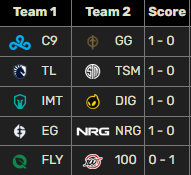


Final tournemt rankings  
  
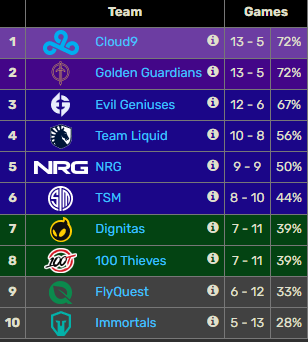

In [16]:
# Creating versus data for week 6 set 1
IMT['matchup'] = 'IMT vs EG'
EG['matchup'] = 'IMT vs EG'
match1 = pd.merge(IMT, EG, on='matchup', how='inner')

GG['matchup'] = 'GG vs TL'
TL['matchup'] = 'GG vs TL'
match2 = pd.merge(GG, TL, on='matchup', how='inner')

FLY['matchup'] = 'FLY vs TSM'
TSM['matchup'] = 'FLY vs TSM'
match3 = pd.merge(FLY, TSM, on='matchup', how='inner')

NRG['matchup'] = 'NRG vs C9'
C9['matchup'] = 'NRG vs C9'
match4 = pd.merge(NRG, C9, on='matchup', how='inner')

DIG['matchup'] = 'DIG vs T100'
T100['matchup'] = 'DIG vs T100'
match5 = pd.merge(DIG, T100, on='matchup', how='inner')

week6 = pd.concat([match1, match2, match3, match4, match5], axis=0, ignore_index=True)
week6.set_index('matchup', inplace=True)
week6


,teamkills_x,teamdeaths_x,firstblood_x,gamelength_x,dpm_x,cspm_x,teamkills_y,teamdeaths_y,firstblood_y,gamelength_y,dpm_y,cspm_y
matchup,,,,,,,,,,,,
IMT vs EG,10.611111,15.722222,0.388889,1839.166667,2120.467928,31.560083,14.111111,11.388889,0.444444,1736.166667,2264.340150,33.632967
GG vs TL,15.315789,11.736842,0.631579,1939.842105,2363.479658,33.847868,14.833333,12.833333,0.611111,1952.611111,2542.255772,32.916394
FLY vs TSM,11.777778,13.111111,0.611111,1879.333333,2024.137150,31.979472,11.333333,12.055556,0.555556,1816.111111,1928.083483,32.525467
NRG vs C9,13.777778,13.722222,0.388889,2056.888889,2241.039656,31.903100,14.315789,8.947368,0.526316,1682.947368,2254.321674,34.985121
DIG vs T100,12.157895,16.263158,0.421053,1989.315789,2195.070516,32.461621,9.315789,12.000000,0.421053,1880.894737,1916.057168,33.831432


In [17]:
# Predicting if team 1 wins the set
classifier.predict(week6)

array([0, 1, 1, 0, 1], dtype=int64)

Actual set results  
  
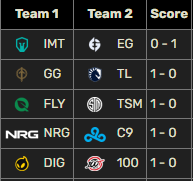

Final tournemt rankings  
  
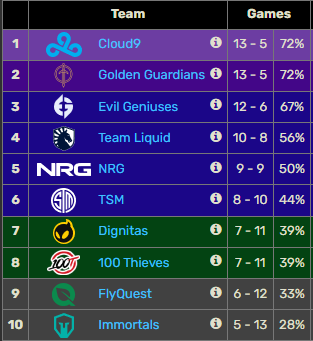

In [18]:
summer_df.head(50)

,teamkills,teamdeaths,firstblood,gamelength,dpm,cspm
teamname,,,,,,
100 Thieves,9.315789,12.000000,0.421053,1880.894737,1916.057168,33.831432
Cloud9,14.315789,8.947368,0.526316,1682.947368,2254.321674,34.985121
Dignitas,12.157895,16.263158,0.421053,1989.315789,2195.070516,32.461621
Evil Geniuses,14.111111,11.388889,0.444444,1736.166667,2264.340150,33.632967
FlyQuest,11.777778,13.111111,0.611111,1879.333333,2024.137150,31.979472
Golden Guardians,15.315789,11.736842,0.631579,1939.842105,2363.479658,33.847868
Immortals,10.611111,15.722222,0.388889,1839.166667,2120.467928,31.560083
NRG,13.777778,13.722222,0.388889,2056.888889,2241.039656,31.903100
TSM,11.333333,12.055556,0.555556,1816.111111,1928.083483,32.525467


In [78]:
#C9 Ranking

C9['matchup'] = 'C9 vs GG'
GG['matchup'] = 'C9 vs GG'
match1 = pd.merge(C9, GG, on='matchup', how='inner')

C9['matchup'] = 'C9 vs EG'
EG['matchup'] = 'C9 vs EG'
match2 = pd.merge(C9, EG, on='matchup', how='inner')

C9['matchup'] = 'C9 vs TL'
TL['matchup'] = 'C9 vs TL'
match3 = pd.merge(C9, TL, on='matchup', how='inner')

C9['matchup'] = 'C9 vs NRG'
NRG['matchup'] = 'C9 vs NRG'
match4 = pd.merge(C9, NRG, on='matchup', how='inner')

C9['matchup'] = 'C9 vs TSM'
TSM['matchup'] = 'C9 vs TSM'
match5 = pd.merge(C9, TSM, on='matchup', how='inner')

C9['matchup'] = 'C9 vs DIG'
DIG['matchup'] = 'C9 vs DIG'
match6 = pd.merge(C9, DIG, on='matchup', how='inner')

C9['matchup'] = 'C9 vs T100'
T100['matchup'] = 'C9 vs T100'
match7 = pd.merge(C9, T100, on='matchup', how='inner')

C9['matchup'] = 'C9 vs FLY'
FLY['matchup'] = 'C9 vs FLY'
match8 = pd.merge(C9, FLY, on='matchup', how='inner')

C9['matchup'] = 'C9 vs IMT'
IMT['matchup'] = 'C9 vs IMT'
match9 = pd.merge(C9, IMT, on='matchup', how='inner')

C9_Matches = pd.concat([match1, match2, match3, match4, match5, match6, match7, match8, match9], axis=0, ignore_index=True)
C9_Matches.set_index('matchup', inplace=True)
classifier.predict(C9_Matches)

array([1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [77]:
#GG Ranking

GG['matchup'] = 'GG vs C9'
C9['matchup'] = 'GG vs C9'
match1 = pd.merge(GG, C9, on='matchup', how='inner')

GG['matchup'] = 'GG vs EG'
EG['matchup'] = 'GG vs EG'
match2 = pd.merge(GG, EG, on='matchup', how='inner')

GG['matchup'] = 'GG vs TL'
TL['matchup'] = 'GG vs TL'
match3 = pd.merge(GG, TL, on='matchup', how='inner')

GG['matchup'] = 'GG vs NRG'
NRG['matchup'] = 'GG vs NRG'
match4 = pd.merge(GG, NRG, on='matchup', how='inner')

GG['matchup'] = 'GG vs TSM'
TSM['matchup'] = 'GG vs TSM'
match5 = pd.merge(GG, TSM, on='matchup', how='inner')

GG['matchup'] = 'GG vs DIG'
DIG['matchup'] = 'GG vs DIG'
match6 = pd.merge(GG, DIG, on='matchup', how='inner')

GG['matchup'] = 'GG vs T100'
T100['matchup'] = 'GG vs T100'
match7 = pd.merge(GG, T100, on='matchup', how='inner')

GG['matchup'] = 'GG vs FLY'
FLY['matchup'] = 'GG vs FLY'
match8 = pd.merge(GG, FLY, on='matchup', how='inner')

GG['matchup'] = 'GG vs IMT'
IMT['matchup'] = 'GG vs IMT'
match9 = pd.merge(GG, IMT, on='matchup', how='inner')

GG_Matches = pd.concat([match1, match2, match3, match4, match5, match6, match7, match8, match9], axis=0, ignore_index=True)
GG_Matches.set_index('matchup', inplace=True)
classifier.predict(GG_Matches)

array([0, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [76]:
#EG Ranking

EG['matchup'] = 'EG vs C9'
C9['matchup'] = 'EG vs C9'
match1 = pd.merge(EG, C9, on='matchup', how='inner')

EG['matchup'] = 'EG vs GG'
GG['matchup'] = 'EG vs GG'
match2 = pd.merge(EG, GG, on='matchup', how='inner')

EG['matchup'] = 'EG vs TL'
TL['matchup'] = 'EG vs TL'
match3 = pd.merge(EG, TL, on='matchup', how='inner')

EG['matchup'] = 'EG vs NRG'
NRG['matchup'] = 'EG vs NRG'
match4 = pd.merge(EG, NRG, on='matchup', how='inner')

EG['matchup'] = 'EG vs TSM'
TSM['matchup'] = 'EG vs TSM'
match5 = pd.merge(EG, TSM, on='matchup', how='inner')

EG['matchup'] = 'EG vs DIG'
DIG['matchup'] = 'EG vs DIG'
match6 = pd.merge(EG, DIG, on='matchup', how='inner')

EG['matchup'] = 'EG vs T100'
T100['matchup'] = 'EG vs T100'
match7 = pd.merge(EG, T100, on='matchup', how='inner')

EG['matchup'] = 'EG vs FLY'
FLY['matchup'] = 'EG vs FLY'
match8 = pd.merge(EG, FLY, on='matchup', how='inner')

EG['matchup'] = 'EG vs IMT'
IMT['matchup'] = 'EG vs IMT'
match9 = pd.merge(EG, IMT, on='matchup', how='inner')

EG_Matches = pd.concat([match1, match2, match3, match4, match5, match6, match7, match8, match9], axis=0, ignore_index=True)
EG_Matches.set_index('matchup', inplace=True)
classifier.predict(EG_Matches)

array([0, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [75]:
#TL Ranking

TL['matchup'] = 'TL vs C9'
C9['matchup'] = 'TL vs C9'
match1 = pd.merge(TL, C9, on='matchup', how='inner')

TL['matchup'] = 'TL vs GG'
GG['matchup'] = 'TL vs GG'
match2 = pd.merge(TL, GG, on='matchup', how='inner')

TL['matchup'] = 'TL vs EG'
EG['matchup'] = 'TL vs EG'
match3 = pd.merge(TL, EG, on='matchup', how='inner')

TL['matchup'] = 'TL vs NRG'
NRG['matchup'] = 'TL vs NRG'
match4 = pd.merge(TL, NRG, on='matchup', how='inner')

TL['matchup'] = 'TL vs TSM'
TSM['matchup'] = 'TL vs TSM'
match5 = pd.merge(TL, TSM, on='matchup', how='inner')

TL['matchup'] = 'TL vs DIG'
DIG['matchup'] = 'TL vs DIG'
match6 = pd.merge(TL, DIG, on='matchup', how='inner')

TL['matchup'] = 'TL vs T100'
T100['matchup'] = 'TL vs T100'
match7 = pd.merge(TL, T100, on='matchup', how='inner')

TL['matchup'] = 'TL vs FLY'
FLY['matchup'] = 'TL vs FLY'
match8 = pd.merge(TL, FLY, on='matchup', how='inner')

TL['matchup'] = 'TL vs IMT'
IMT['matchup'] = 'TL vs IMT'
match9 = pd.merge(TL, IMT, on='matchup', how='inner')

TL_Matches = pd.concat([match1, match2, match3, match4, match5, match6, match7, match8, match9], axis=0, ignore_index=True)
TL_Matches.set_index('matchup', inplace=True)
classifier.predict(TL_Matches)

array([0, 0, 0, 1, 1, 1, 1, 1, 1], dtype=int64)

In [74]:
#NRG Ranking

NRG['matchup'] = 'NRG vs C9'
C9['matchup'] = 'NRG vs C9'
match1 = pd.merge(NRG, C9, on='matchup', how='inner')

NRG['matchup'] = 'NRG vs GG'
GG['matchup'] = 'NRG vs GG'
match2 = pd.merge(NRG, GG, on='matchup', how='inner')

NRG['matchup'] = 'NRG vs EG'
EG['matchup'] = 'NRG vs EG'
match3 = pd.merge(NRG, EG, on='matchup', how='inner')

NRG['matchup'] = 'NRG vs TL'
TL['matchup'] = 'NRG vs TL'
match4 = pd.merge(NRG, TL, on='matchup', how='inner')

NRG['matchup'] = 'NRG vs TSM'
TSM['matchup'] = 'NRG vs TSM'
match5 = pd.merge(NRG, TSM, on='matchup', how='inner')

NRG['matchup'] = 'NRG vs DIG'
DIG['matchup'] = 'NRG vs DIG'
match6 = pd.merge(NRG, DIG, on='matchup', how='inner')

NRG['matchup'] = 'NRG vs T100'
T100['matchup'] = 'NRG vs T100'
match7 = pd.merge(NRG, T100, on='matchup', how='inner')

NRG['matchup'] = 'NRG vs FLY'
FLY['matchup'] = 'NRG vs FLY'
match8 = pd.merge(NRG, FLY, on='matchup', how='inner')

NRG['matchup'] = 'NRG vs IMT'
IMT['matchup'] = 'NRG vs IMT'
match9 = pd.merge(NRG, IMT, on='matchup', how='inner')

NRG_Matches = pd.concat([match1, match2, match3, match4, match5, match6, match7, match8, match9], axis=0, ignore_index=True)
NRG_Matches.set_index('matchup', inplace=True)
classifier.predict(NRG_Matches)

array([0, 0, 0, 0, 1, 1, 1, 1, 1], dtype=int64)

In [73]:
#TSM Ranking

TSM['matchup'] = 'TSM vs C9'
C9['matchup'] = 'TSM vs C9'
match1 = pd.merge(TSM, C9, on='matchup', how='inner')

TSM['matchup'] = 'TSM vs GG'
GG['matchup'] = 'TSM vs GG'
match2 = pd.merge(TSM, GG, on='matchup', how='inner')

TSM['matchup'] = 'TSM vs EG'
EG['matchup'] = 'TSM vs EG'
match3 = pd.merge(TSM, EG, on='matchup', how='inner')

TSM['matchup'] = 'TSM vs TL'
TL['matchup'] = 'TSM vs TL'
match4 = pd.merge(TSM, TL, on='matchup', how='inner')

TSM['matchup'] = 'TSM vs NRG'
NRG['matchup'] = 'TSM vs NRG'
match5 = pd.merge(TSM, NRG, on='matchup', how='inner')

TSM['matchup'] = 'TSM vs DIG'
DIG['matchup'] = 'TSM vs DIG'
match6 = pd.merge(TSM, DIG, on='matchup', how='inner')

TSM['matchup'] = 'TSM vs T100'
T100['matchup'] = 'TSM vs T100'
match7 = pd.merge(TSM, T100, on='matchup', how='inner')

TSM['matchup'] = 'TSM vs FLY'
FLY['matchup'] = 'TSM vs FLY'
match8 = pd.merge(TSM, FLY, on='matchup', how='inner')

TSM['matchup'] = 'TSM vs IMT'
IMT['matchup'] = 'TSM vs IMT'
match9 = pd.merge(TSM, IMT, on='matchup', how='inner')

TSM_Matches = pd.concat([match1, match2, match3, match4, match5, match6, match7, match8, match9], axis=0, ignore_index=True)
TSM_Matches.set_index('matchup', inplace=True)
classifier.predict(TSM_Matches)

array([0, 0, 0, 0, 0, 1, 1, 1, 1], dtype=int64)

In [72]:
#DIG Ranking

DIG['matchup'] = 'DIG vs C9'
C9['matchup'] = 'DIG vs C9'
match1 = pd.merge(DIG, C9, on='matchup', how='inner')

DIG['matchup'] = 'DIG vs GG'
GG['matchup'] = 'DIG vs GG'
match2 = pd.merge(DIG, GG, on='matchup', how='inner')

DIG['matchup'] = 'DIG vs EG'
EG['matchup'] = 'DIG vs EG'
match3 = pd.merge(DIG, EG, on='matchup', how='inner')

DIG['matchup'] = 'DIG vs TL'
TL['matchup'] = 'DIG vs TL'
match4 = pd.merge(DIG, TL, on='matchup', how='inner')

DIG['matchup'] = 'DIG vs NRG'
NRG['matchup'] = 'DIG vs NRG'
match5 = pd.merge(DIG, NRG, on='matchup', how='inner')

DIG['matchup'] = 'DIG vs TSM'
TSM['matchup'] = 'DIG vs TSM'
match6 = pd.merge(DIG, TSM, on='matchup', how='inner')

DIG['matchup'] = 'DIG vs T100'
T100['matchup'] = 'DIG vs T100'
match7 = pd.merge(DIG, T100, on='matchup', how='inner')

DIG['matchup'] = 'DIG vs FLY'
FLY['matchup'] = 'DIG vs FLY'
match8 = pd.merge(DIG, FLY, on='matchup', how='inner')

DIG['matchup'] = 'DIG vs IMT'
IMT['matchup'] = 'DIG vs IMT'
match9 = pd.merge(DIG, IMT, on='matchup', how='inner')

DIG_Matches = pd.concat([match1, match2, match3, match4, match5, match6, match7, match8, match9], axis=0, ignore_index=True)
DIG_Matches.set_index('matchup', inplace=True)
classifier.predict(DIG_Matches)

array([0, 0, 0, 0, 0, 1, 1, 1, 1], dtype=int64)

In [71]:
#T100 Ranking

T100['matchup'] = 'T100 vs C9'
C9['matchup'] = 'T100 vs C9'
match1 = pd.merge(T100, C9, on='matchup', how='inner')

T100['matchup'] = 'T100 vs GG'
GG['matchup'] = 'T100 vs GG'
match2 = pd.merge(T100, GG, on='matchup', how='inner')

T100['matchup'] = 'T100 vs EG'
EG['matchup'] = 'T100 vs EG'
match3 = pd.merge(T100, EG, on='matchup', how='inner')

T100['matchup'] = 'T100 vs TL'
TL['matchup'] = 'T100 vs TL'
match4 = pd.merge(T100, TL, on='matchup', how='inner')

T100['matchup'] = 'T100 vs NRG'
NRG['matchup'] = 'T100 vs NRG'
match5 = pd.merge(T100, NRG, on='matchup', how='inner')

T100['matchup'] = 'T100 vs TSM'
TSM['matchup'] = 'T100 vs TSM'
match6 = pd.merge(T100, TSM, on='matchup', how='inner')

T100['matchup'] = 'T100 vs DIG'
DIG['matchup'] = 'T100 vs DIG'
match7 = pd.merge(T100, DIG, on='matchup', how='inner')

T100['matchup'] = 'T100 vs FLY'
FLY['matchup'] = 'T100 vs FLY'
match8 = pd.merge(T100, FLY, on='matchup', how='inner')

T100['matchup'] = 'T100 vs IMT'
IMT['matchup'] = 'T100 vs IMT'
match9 = pd.merge(T100, IMT, on='matchup', how='inner')

T100_Matches = pd.concat([match1, match2, match3, match4, match5, match6, match7, match8, match9], axis=0, ignore_index=True)
T100_Matches.set_index('matchup', inplace=True)
classifier.predict(T100_Matches)

array([0, 0, 0, 0, 1, 1, 1, 1, 1], dtype=int64)

In [69]:
#FLY Ranking

FLY['matchup'] = 'FLY vs C9'
C9['matchup'] = 'FLY vs C9'
match1 = pd.merge(FLY, C9, on='matchup', how='inner')

FLY['matchup'] = 'FLY vs GG'
GG['matchup'] = 'FLY vs GG'
match2 = pd.merge(FLY, GG, on='matchup', how='inner')

FLY['matchup'] = 'FLY vs EG'
EG['matchup'] = 'FLY vs EG'
match3 = pd.merge(FLY, EG, on='matchup', how='inner')

FLY['matchup'] = 'FLY vs TL'
TL['matchup'] = 'FLY vs TL'
match4 = pd.merge(FLY, TL, on='matchup', how='inner')

FLY['matchup'] = 'FLY vs NRG'
NRG['matchup'] = 'FLY vs NRG'
match5 = pd.merge(FLY, NRG, on='matchup', how='inner')

FLY['matchup'] = 'FLY vs TSM'
TSM['matchup'] = 'FLY vs TSM'
match6 = pd.merge(FLY, TSM, on='matchup', how='inner')

FLY['matchup'] = 'FLY vs DIG'
DIG['matchup'] = 'FLY vs DIG'
match7 = pd.merge(FLY, DIG, on='matchup', how='inner')

FLY['matchup'] = 'FLY vs T100'
T100['matchup'] = 'FLY vs T100'
match8 = pd.merge(FLY, T100, on='matchup', how='inner')

FLY['matchup'] = 'FLY vs IMT'
IMT['matchup'] = 'FLY vs IMT'
match9 = pd.merge(FLY, IMT, on='matchup', how='inner')

FLY_Matches = pd.concat([match1, match2, match3, match4, match5, match6, match7, match8, match9], axis=0, ignore_index=True)
FLY_Matches.set_index('matchup', inplace=True)
classifier.predict(FLY_Matches)

array([0, 0, 0, 0, 0, 1, 1, 0, 1], dtype=int64)

In [70]:
#IMT Ranking

IMT['matchup'] = 'IMT vs C9'
C9['matchup'] = 'IMT vs C9'
match1 = pd.merge(IMT, C9, on='matchup', how='inner')

IMT['matchup'] = 'IMT vs GG'
GG['matchup'] = 'IMT vs GG'
match2 = pd.merge(IMT, GG, on='matchup', how='inner')

IMT['matchup'] = 'IMT vs EG'
EG['matchup'] = 'IMT vs EG'
match3 = pd.merge(IMT, EG, on='matchup', how='inner')

IMT['matchup'] = 'IMT vs TL'
TL['matchup'] = 'IMT vs TL'
match4 = pd.merge(IMT, TL, on='matchup', how='inner')

IMT['matchup'] = 'IMT vs NRG'
NRG['matchup'] = 'IMT vs NRG'
match5 = pd.merge(IMT, NRG, on='matchup', how='inner')

IMT['matchup'] = 'IMT vs TSM'
TSM['matchup'] = 'IMT vs TSM'
match6 = pd.merge(IMT, TSM, on='matchup', how='inner')

IMT['matchup'] = 'IMTLY vs DIG'
DIG['matchup'] = 'IMT vs DIG'
match7 = pd.merge(IMT, DIG, on='matchup', how='inner')

IMT['matchup'] = 'IMT vs T100'
T100['matchup'] = 'IMT vs T100'
match8 = pd.merge(IMT, T100, on='matchup', how='inner')

IMT['matchup'] = 'IMT vs FLY'
FLY['matchup'] = 'IMT vs FLY'
match9 = pd.merge(IMT, FLY, on='matchup', how='inner')

IMT_Matches = pd.concat([match1, match2, match3, match4, match5, match6, match7, match8, match9], axis=0, ignore_index=True)
IMT_Matches.set_index('matchup', inplace=True)
classifier.predict(IMT_Matches)

array([0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [87]:
#Predicted Rankings

predicted_results = {
    'Team' : ['Cloud9','Golden Guardians','Evil Geniuses','Team Liquid','100 Thieves','NRG','TSM','Dignitas','FlyQuest','Immortals' ],
    'Wins': [9,8,7,6,5,5,4,4,3,0],
    'Losses':[0,1,2,3,4,4,5,5,6,9],
    'Rank': [1,2,3,4,5,5,7,7,9,10]
}
predicted_results_df = pd.DataFrame(predicted_results)
predicted_results_df = predicted_results_df.set_index('Rank')
predicted_results_df

,Team,Wins,Losses
Rank,,,
1,Cloud9,9,0
2,Golden Guardians,8,1
3,Evil Geniuses,7,2
4,Team Liquid,6,3
5,100 Thieves,5,4
5,NRG,5,4
7,TSM,4,5
7,Dignitas,4,5
9,FlyQuest,3,6


Final tournemt rankings  
  
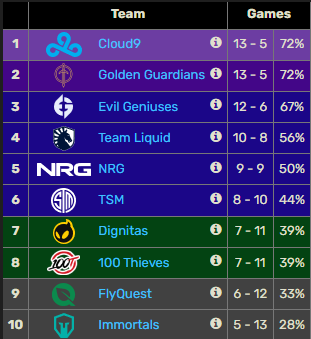

Actual Set Results

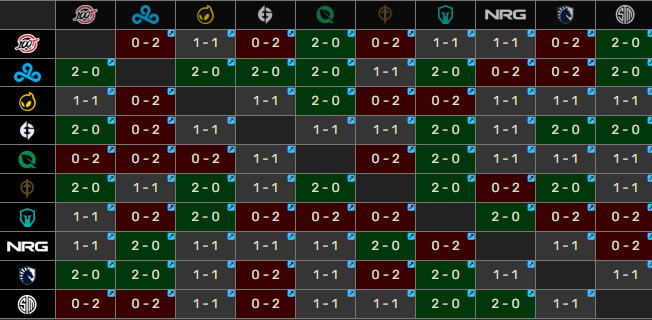